# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



### 1. Load the Data (5 marks)
- Load the dataset into a Pandas DataFrame.
- Display the first five rows to understand the structure.
- Check for missing values.

In [3]:
raw_df = pd.read_csv('/content/bank.csv')
raw_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
raw_df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Observations
1. No missing values present in dataset


### 2. Data Inspection (5 marks)
- Display the data types of all columns.
- Check for duplicate values and handle them if necessary.
- Identify the target variable.

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
raw_df[raw_df.duplicated()]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
raw_df['y'].value_counts(normalize=True)

,proportion
y,
no,0.88476
yes,0.11524


Obervations
1. No duplicate value present in data.
2. The dataset contains mainly object(string) and integer datatypes
3. 88% of customers have not opted for the plan while only 11% customers chose the plan.


### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.

In [8]:
raw_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution')

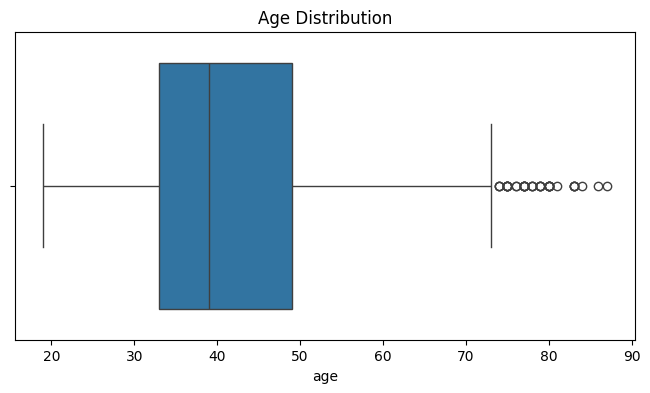

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(data=raw_df,x='age')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Job Distribution')

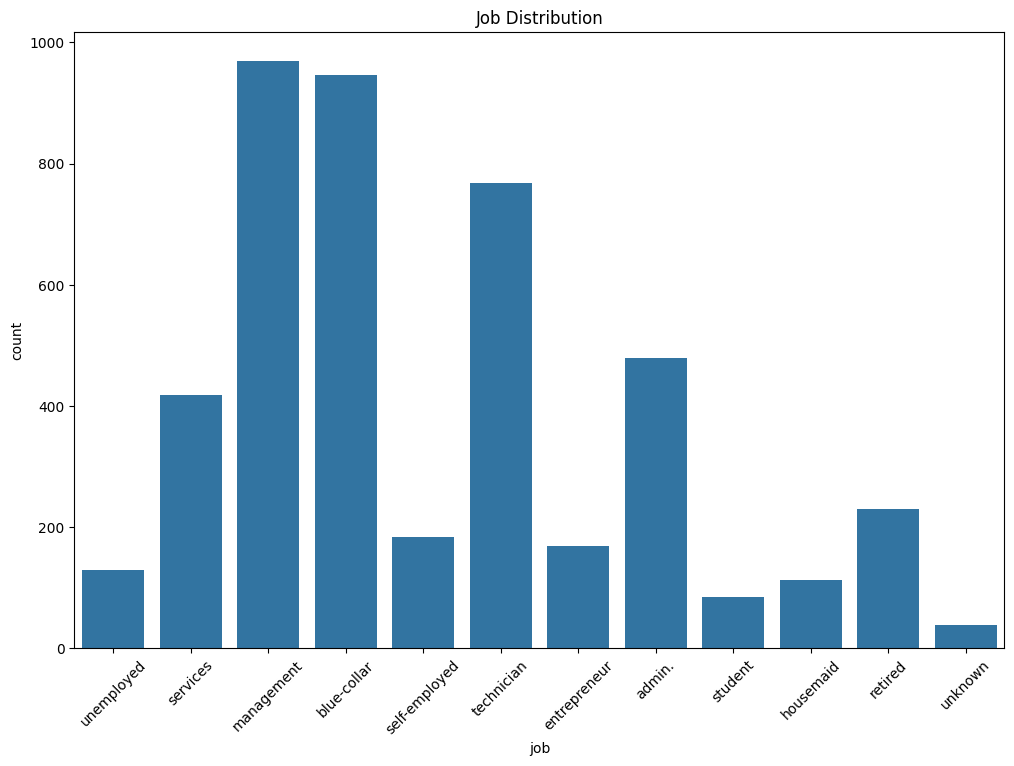

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(data=raw_df,x='job',orient='h')
plt.xticks(rotation=45)
plt.title('Job Distribution')

In [11]:
#raw_df.groupby('job').size()
raw_df['job'].value_counts()

,count
job,
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


,count
marital,
married,2797
single,1196
divorced,528


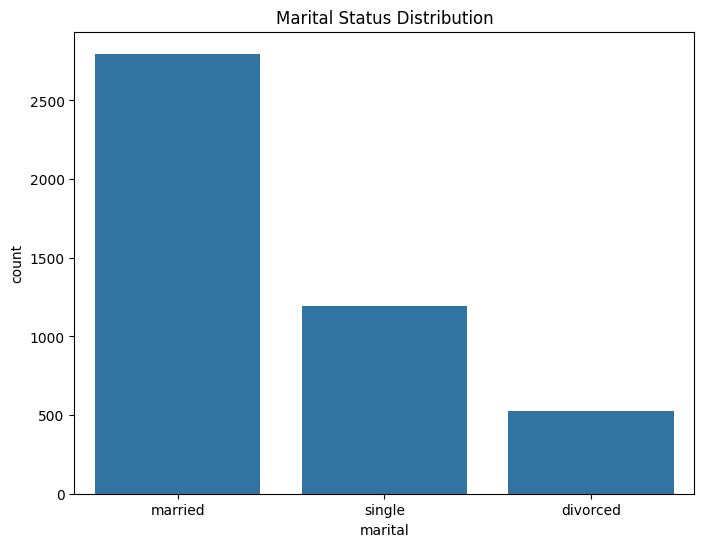

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='marital')
#plt.xticks(rotation=45)
plt.title('Marital Status Distribution')

raw_df['marital'].value_counts()

,count
education,
secondary,2306
tertiary,1350
primary,678
unknown,187


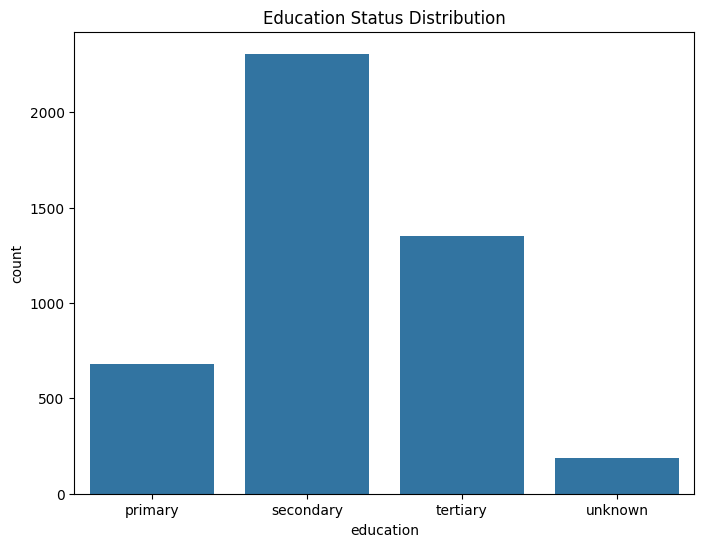

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='education')
#plt.xticks(rotation=45)
plt.title('Education Status Distribution')

raw_df['education'].value_counts()

,count
default,
no,4445
yes,76


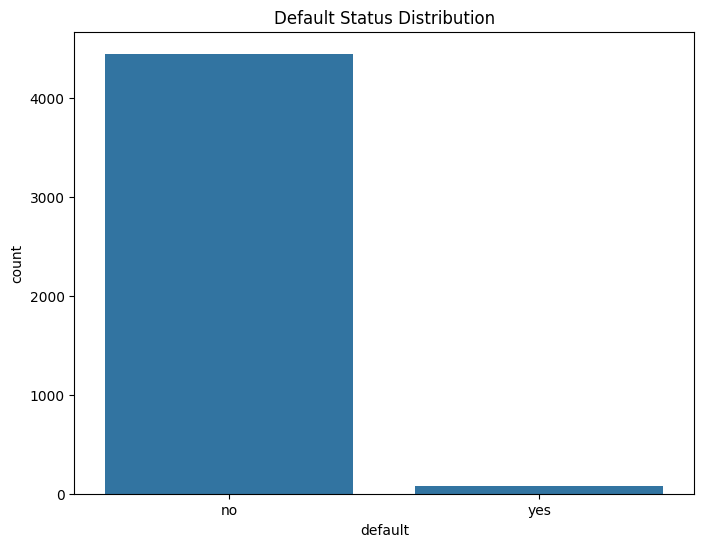

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='default')
#plt.xticks(rotation=45)
plt.title('Default Status Distribution')

raw_df['default'].value_counts()

Text(0.5, 1.0, 'Balance Distribution')

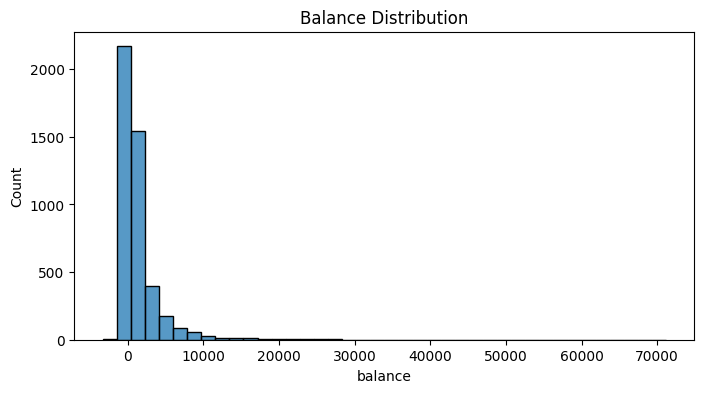

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(data=raw_df,x='balance',bins=40)
plt.title('Balance Distribution')

,count
housing,
yes,2559
no,1962


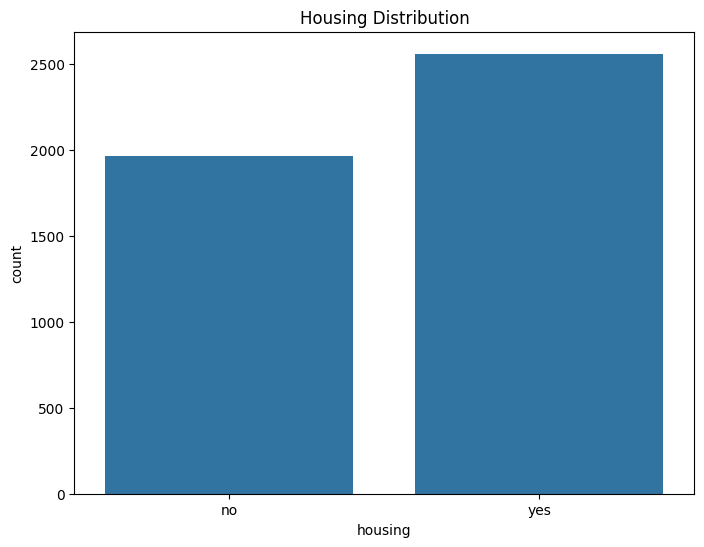

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='housing')
#plt.xticks(rotation=45)
plt.title('Housing Distribution')

raw_df['housing'].value_counts()

,count
loan,
no,3830
yes,691


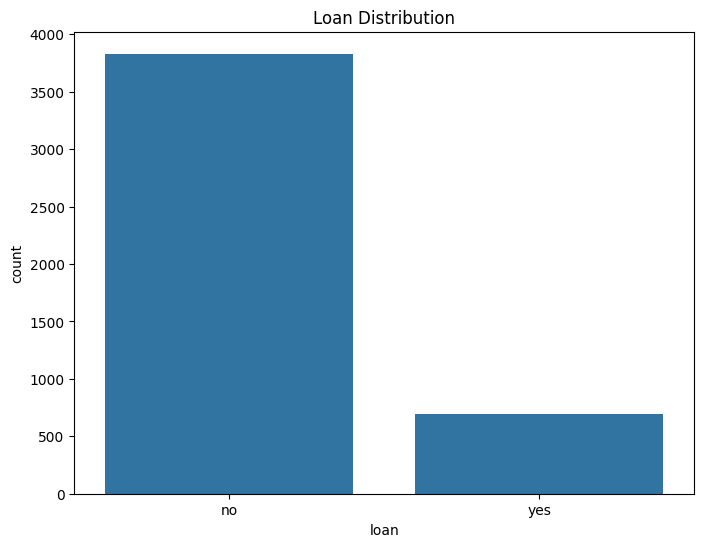

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='loan')
#plt.xticks(rotation=45)
plt.title('Loan Distribution')

raw_df['loan'].value_counts()

,count
contact,
cellular,2896
unknown,1324
telephone,301


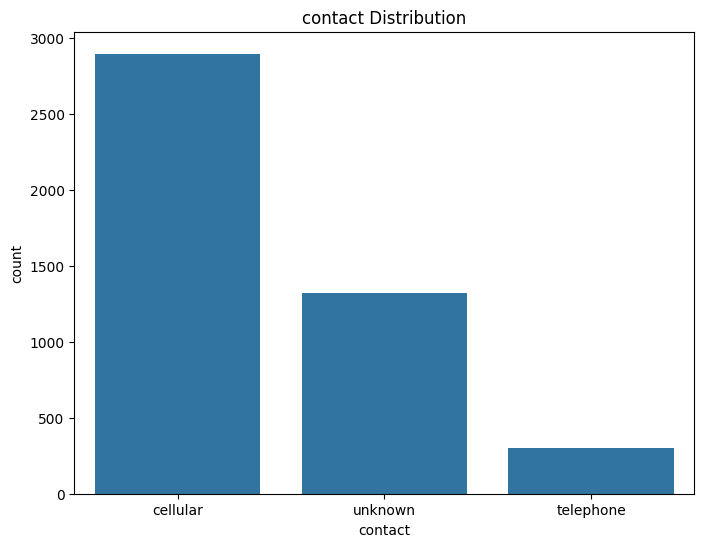

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='contact')
#plt.xticks(rotation=45)
plt.title('contact Distribution')

raw_df['contact'].value_counts()

Text(0.5, 1.0, 'Campaign Distribution')

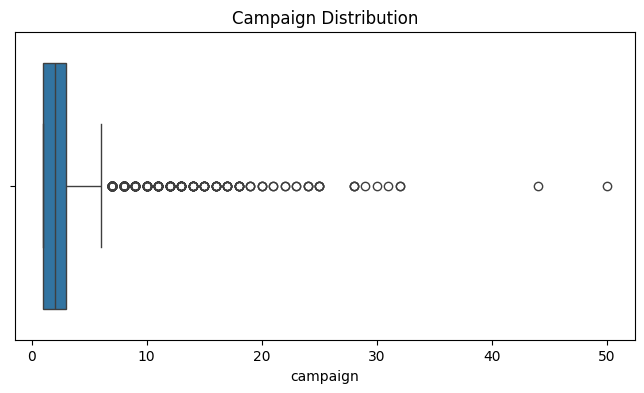

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=raw_df,x='campaign')
plt.title('Campaign Distribution')

Text(0.5, 1.0, 'pdays Distribution')

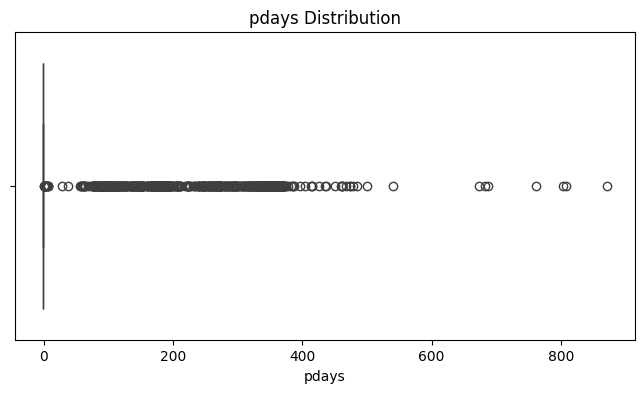

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(data=raw_df,x='pdays')
plt.title('pdays Distribution')

Text(0.5, 1.0, 'previous Distribution')

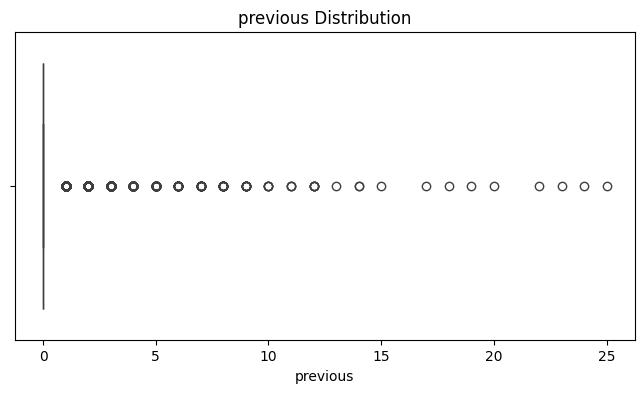

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(data=raw_df,x='previous')
plt.title('previous Distribution')

,count
poutcome,
unknown,3705
failure,490
other,197
success,129


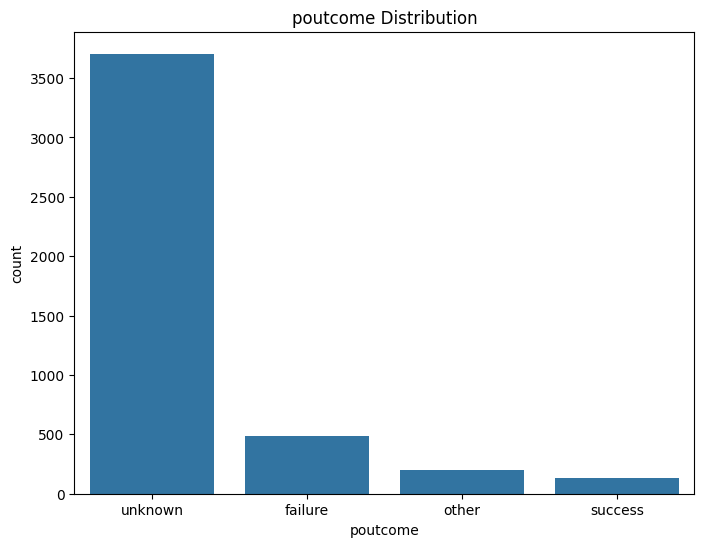

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='poutcome')
#plt.xticks(rotation=45)
plt.title('poutcome Distribution')

raw_df['poutcome'].value_counts()

,count
y,
no,4000
yes,521


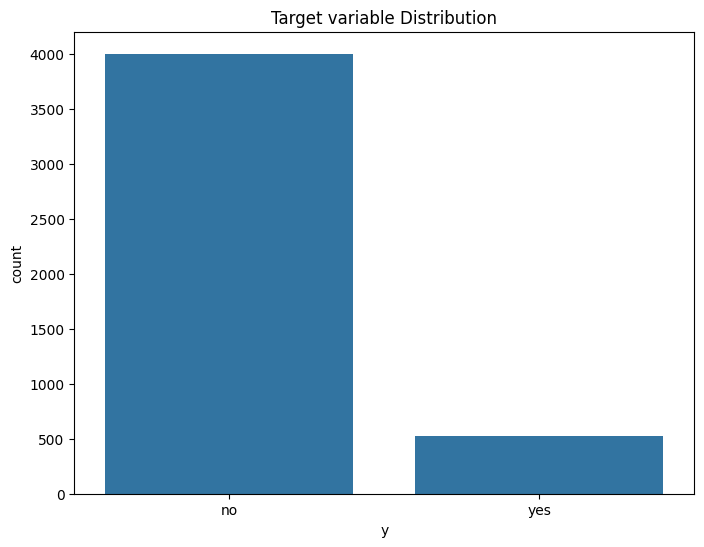

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_df,x='y')
#plt.xticks(rotation=45)
plt.title('Target variable Distribution')

raw_df['y'].value_counts()

### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

In [24]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


Observations
1. All the numeric columnns are right skewed except for day column


### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

### 6. Bivariate Analysis (10 marks)
- Analyze the relationship of each independent variable with the target variable.
- Use scatter plots, bar plots, and box plots for visualization.

Text(0.5, 1.0, 'Age vs y')

<Figure size 800x600 with 0 Axes>

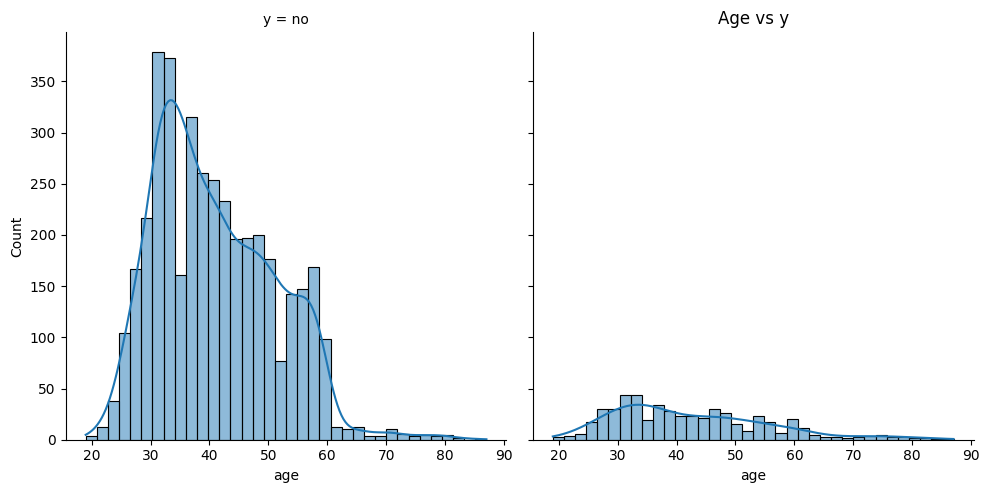

In [25]:
# Age vs y

plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='age',col='y',kde=True)
plt.title('Age vs y')

Text(0.5, 1.0, 'Job vs y')

<Figure size 800x600 with 0 Axes>

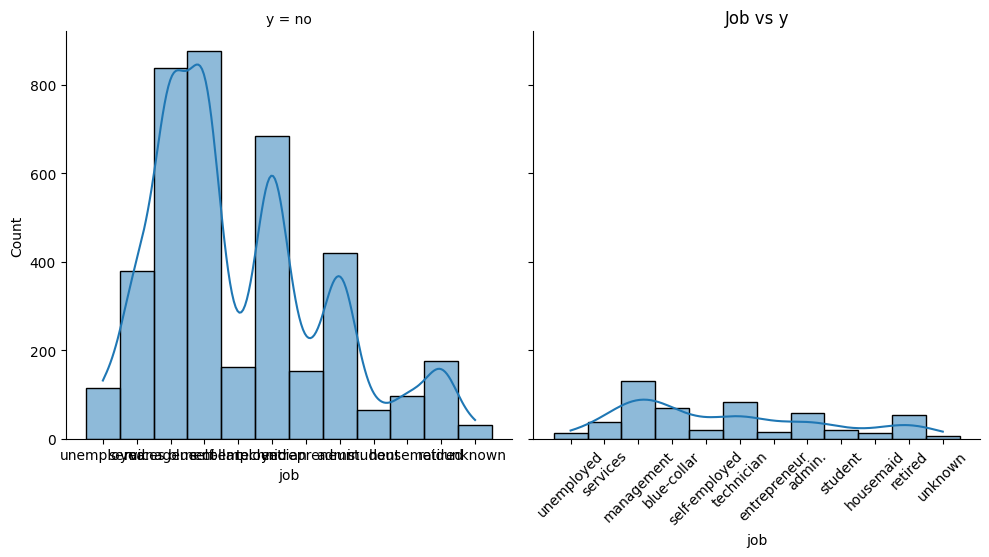

In [26]:
plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='job',col='y',kde=True)
plt.xticks(rotation=45)
plt.title('Job vs y')

<Figure size 800x600 with 0 Axes>

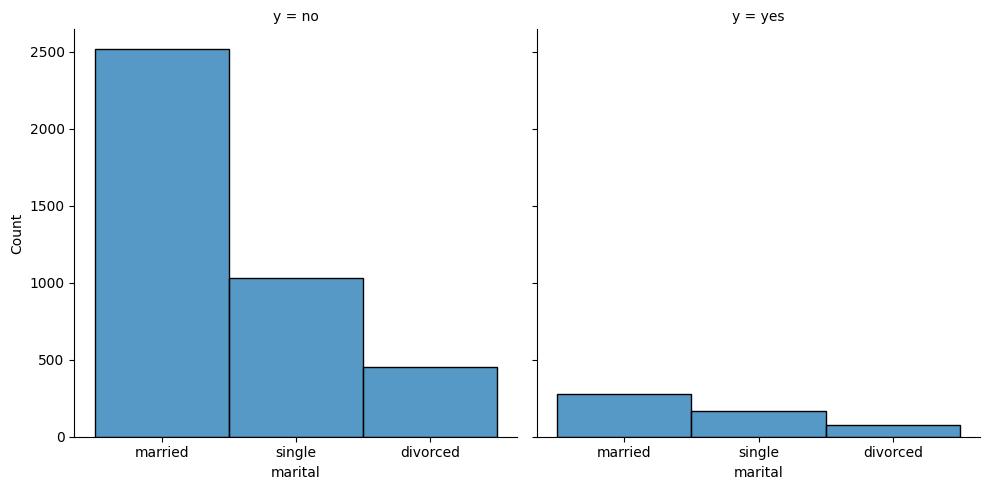

In [27]:
plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='marital',col='y')


<Figure size 800x600 with 0 Axes>

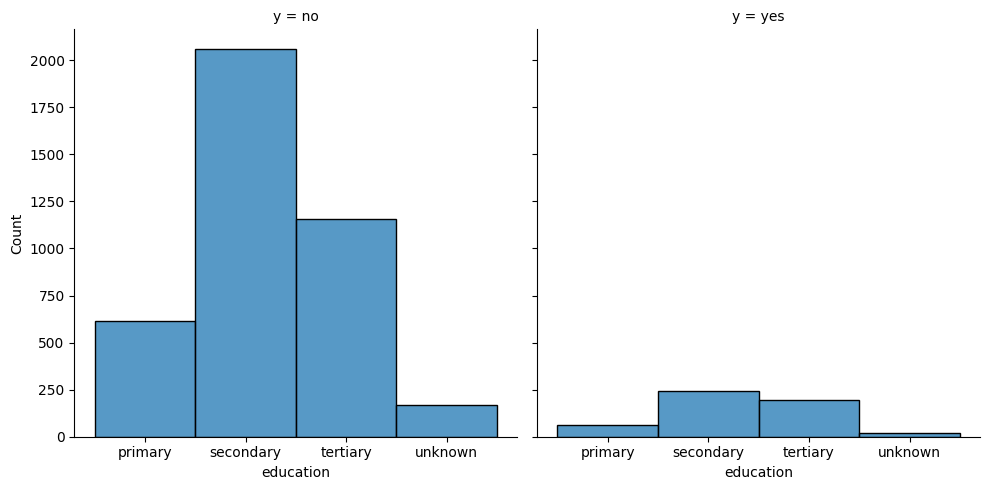

In [28]:
plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='education',col='y')

<Figure size 800x600 with 0 Axes>

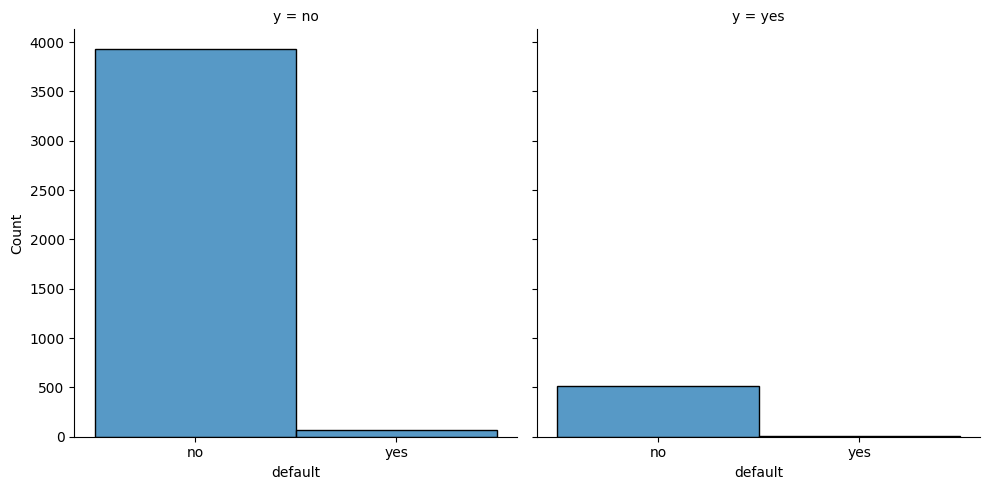

In [29]:
plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='default',col='y')

<Axes: xlabel='balance'>

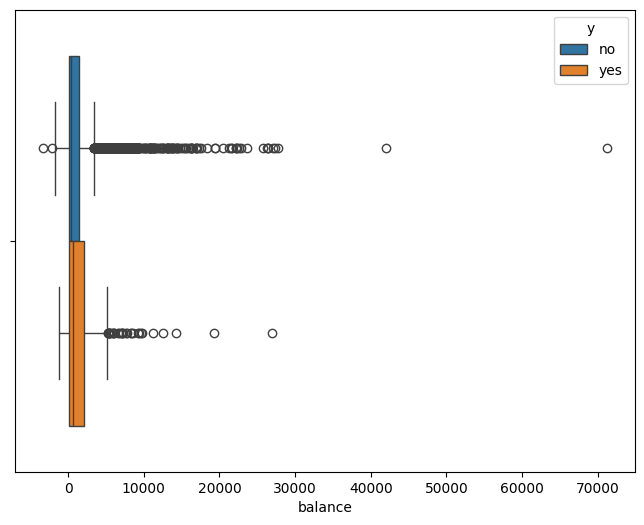

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=raw_df,x='balance',hue='y')

<Figure size 800x600 with 0 Axes>

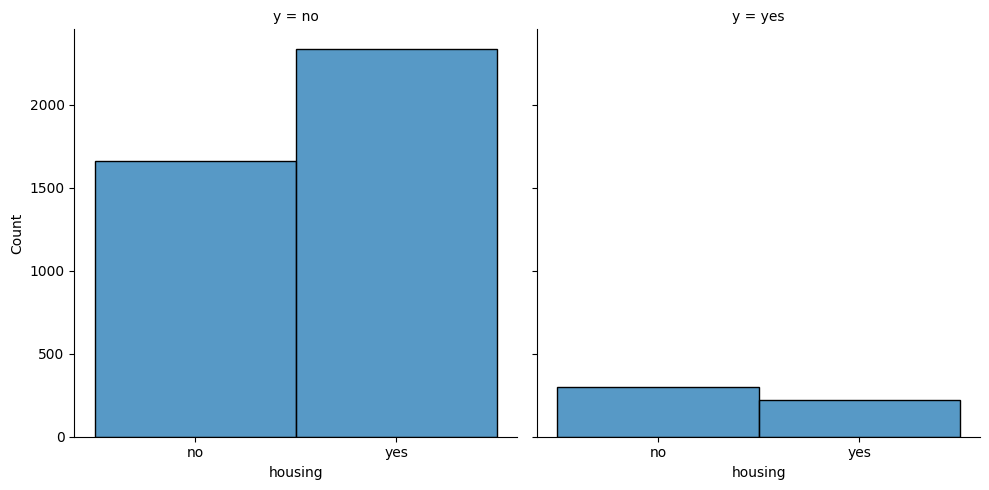

In [31]:
plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='housing',col='y')

<Figure size 800x600 with 0 Axes>

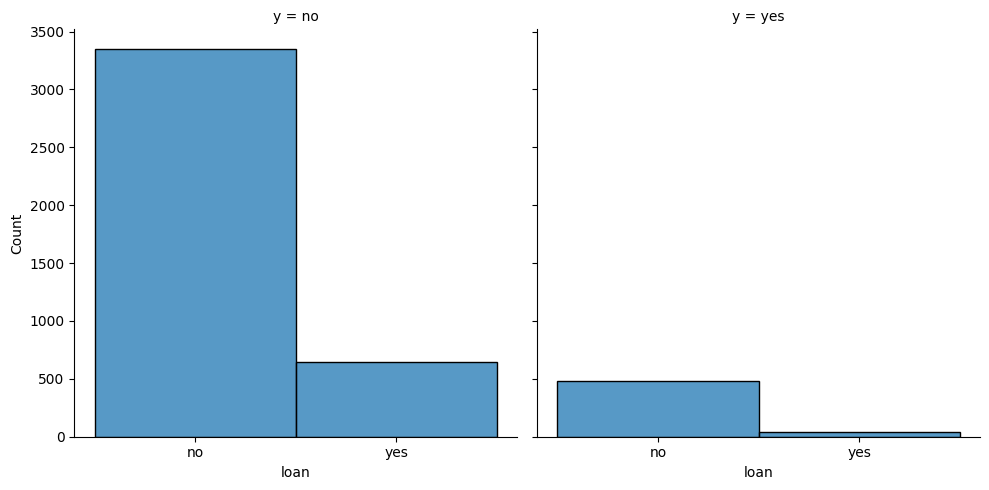

In [32]:
plt.figure(figsize=(8,6))
sns.displot(data=raw_df,x='loan',col='y')

### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

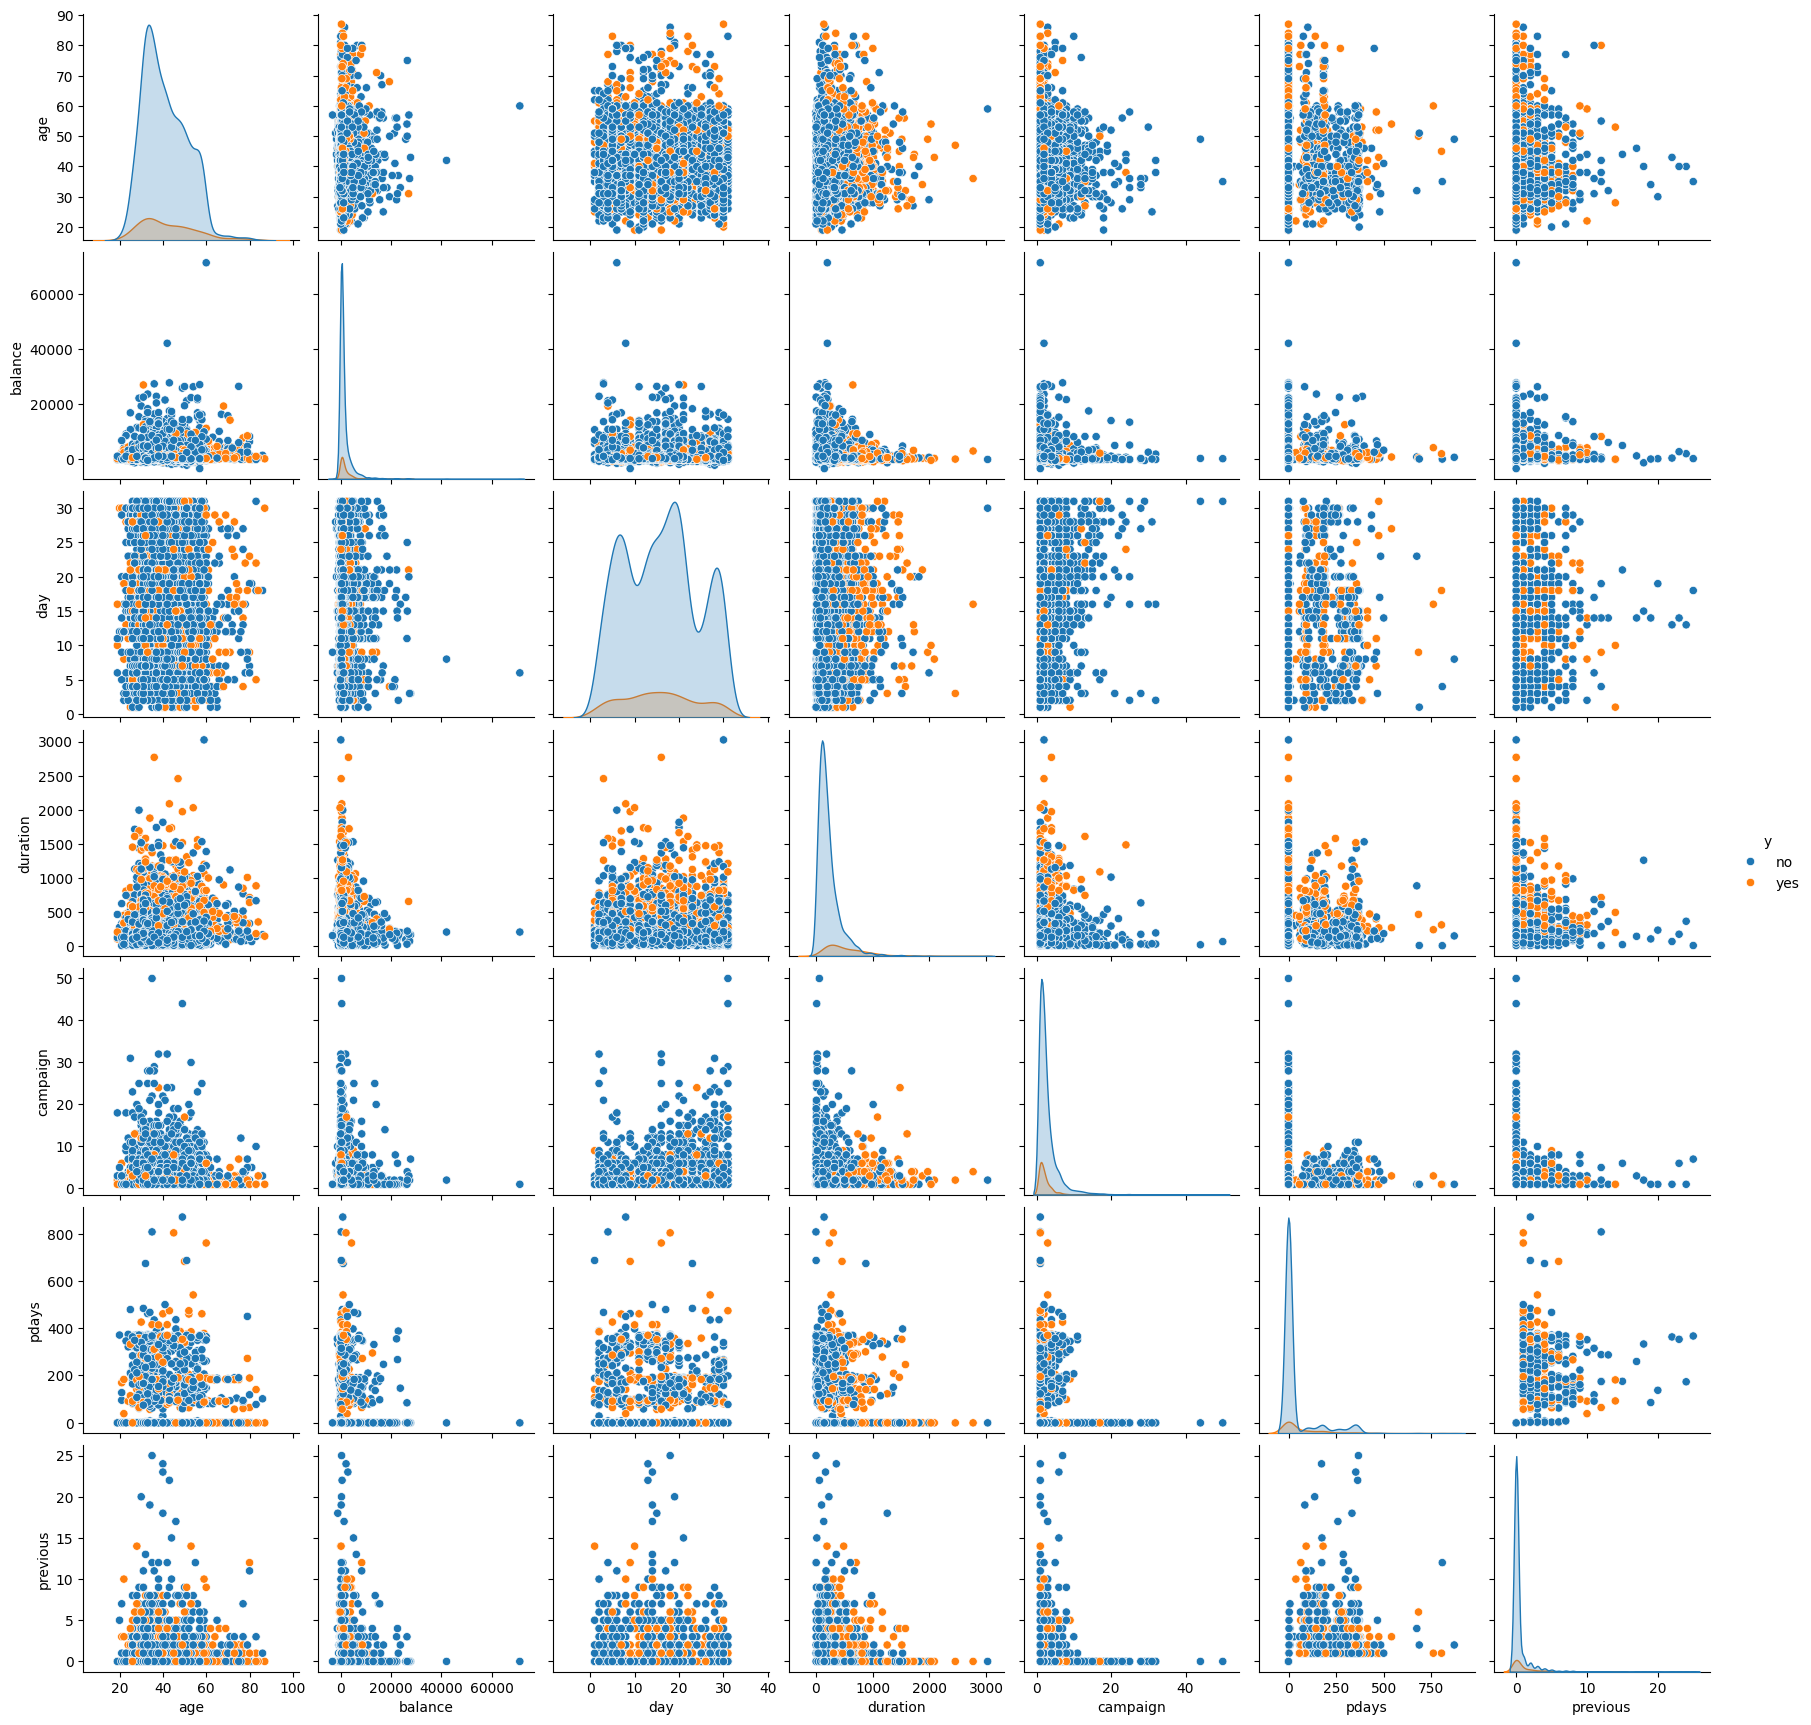

In [33]:
sns.pairplot(raw_df,hue='y',diag_kind='kde')

In [34]:
raw_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [35]:
# calculating the Q1 and Q3 for age
age_q1 = np.percentile(raw_df['age'],25)
age_q3 = np.percentile(raw_df['age'],75)
age_iqr = age_q3 - age_q1

# defining lower and upper bound

age_lbound = age_q1 - 1.5 * age_iqr
age_ubound = age_q3 + 1.5 * age_iqr

# Filtering age outliers
raw_df= raw_df[(raw_df['age']>= age_lbound) & (raw_df['age']<= age_ubound)]
raw_df.shape




(4483, 17)

In [36]:
# calculating the Q1 and Q3 for campaign
campaign_q1 = np.percentile(raw_df['campaign'],25)
campaign_q3 = np.percentile(raw_df['campaign'],75)
campaign_iqr = campaign_q3 - campaign_q1

# defining lower and upper bound

campaign_lbound = campaign_q1 - 1.5 * campaign_iqr
campaign_ubound = campaign_q3 + 1.5 * campaign_iqr

# Filtering age outliers
raw_df= raw_df[(raw_df['campaign']>= campaign_lbound) & (raw_df['campaign']<= campaign_ubound)]
raw_df.shape

(4169, 17)

In [37]:
## Label Encoding for columns which have meaningful order data eg. education, ranking
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

raw_df['education_encoded'] = encoder.fit_transform(raw_df['education'])
raw_df['job_encoded'] = encoder.fit_transform(raw_df['job'])
raw_df['marital_encoded'] = encoder.fit_transform(raw_df['marital'])

raw_df['default'] = encoder.fit_transform(raw_df['default'])
raw_df['housing'] = encoder.fit_transform(raw_df['housing'])
raw_df['loan'] =  encoder.fit_transform(raw_df['loan'])

raw_df['contact'] =  encoder.fit_transform(raw_df['contact'])
raw_df['month'] =  encoder.fit_transform(raw_df['month'])
raw_df['poutcome'] =  encoder.fit_transform(raw_df['poutcome'])
raw_df['y'] =  encoder.fit_transform(raw_df['y'])

raw_df.drop(columns=['job', 'marital', 'education','pdays','previous'],inplace=True)
raw_df.head()






,age,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y,education_encoded,job_encoded,marital_encoded
0,30,0,1787,0,0,0,19,10,79,1,3,0,0,10,1
1,33,0,4789,1,1,0,11,8,220,1,0,0,1,7,1
2,35,0,1350,1,0,0,16,0,185,1,0,0,2,4,2
3,30,0,1476,1,1,2,3,6,199,4,3,0,2,4,1
4,59,0,0,1,0,2,5,8,226,1,3,0,1,1,1


In [38]:
raw_df['poutcome'].value_counts()

,count
poutcome,
3,3393
0,467
1,186
2,123


In [39]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler()

raw_df[['age','balance','day','month','duration','campaign']] = scaled_data.fit_transform(raw_df[['age','balance','day','month','duration','campaign']])

raw_df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y,education_encoded,job_encoded,marital_encoded
0,-1.077911,0,0.125267,0,0,0,0.411359,1.461438,-0.727690,-0.856065,3,0,0,10,1
1,-0.779900,0,1.131149,1,1,0,-0.564157,0.796727,-0.183936,-0.856065,0,0,1,7,1
2,-0.581226,0,-0.021158,1,0,0,0.045541,-1.862113,-0.318911,-0.856065,0,0,2,4,2
3,-1.077911,0,0.021061,1,1,2,-1.539672,0.132017,-0.264921,1.389489,3,0,2,4,1
4,1.802865,0,-0.473503,1,0,2,-1.295794,0.796727,-0.160798,-0.856065,3,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.879237,0,-0.315015,1,0,0,-1.051915,-0.200338,1.374052,2.138007,3,0,1,7,2
4516,-0.779900,0,-0.585082,1,0,0,1.752694,-0.200338,0.236412,2.138007,3,0,1,7,1
4517,1.604191,1,-1.583591,1,1,2,-0.808036,0.796727,-0.442316,-0.856065,3,0,2,6,1
4519,-1.276586,0,-0.092528,0,0,0,-1.173854,-0.865048,-0.534869,1.389489,1,0,1,1,1


### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

<Axes: >

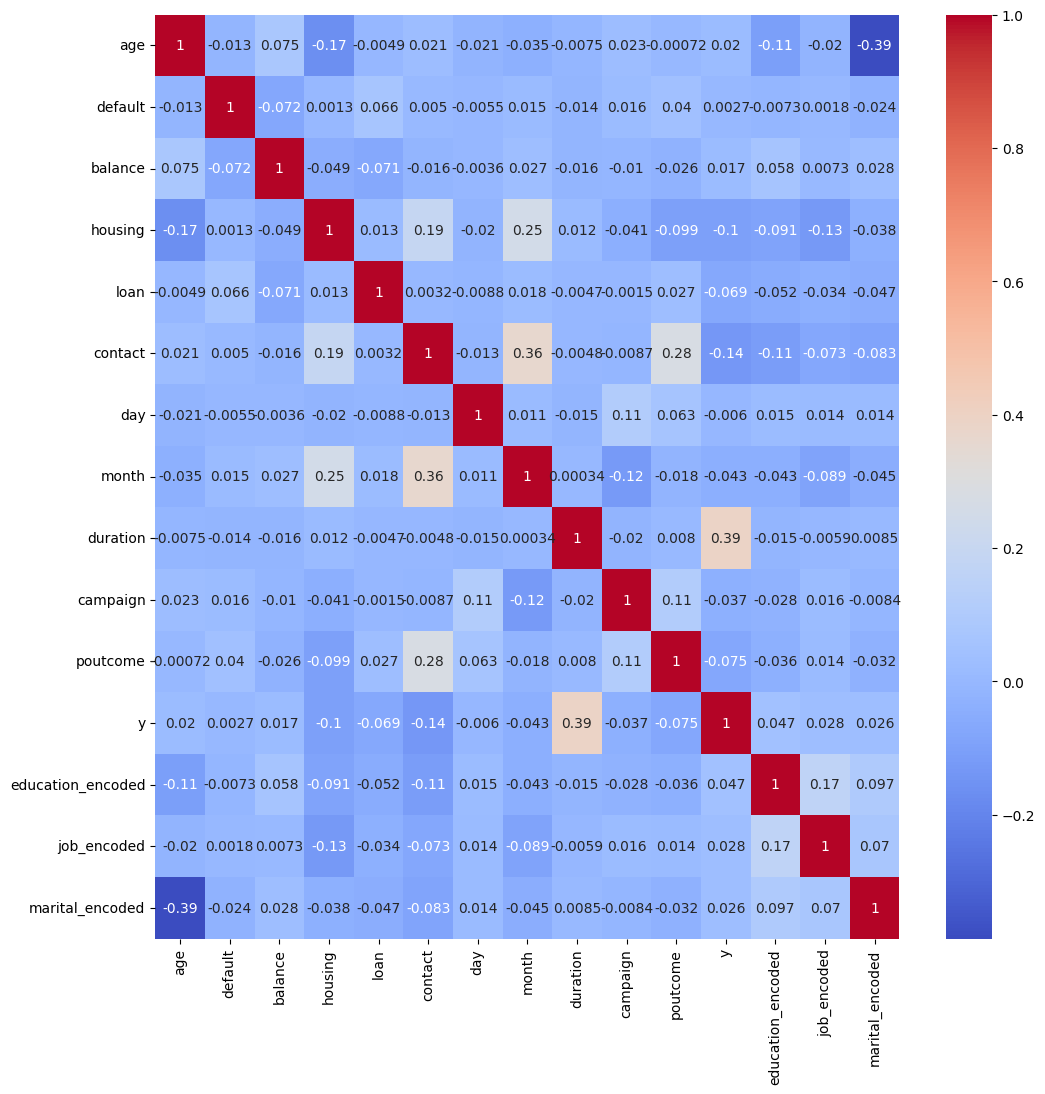

In [40]:
plt.figure(figsize=(12,12))

sns.heatmap(data=raw_df.corr(),annot=True,cmap='coolwarm')

### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [41]:
from sklearn.model_selection import train_test_split

X = raw_df.drop(['y'],axis=1)
y = raw_df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8744007670182167

In [50]:

model_score_train = model.score(X_train, y_train)

model_score_train

0.8934740882917467

### 11. Interpretation of Metrics (10 marks)
- Analyze the model's performance based on the evaluation metrics.
- Explain any trade-offs observed in precision and recall.


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       921
           1       0.40      0.14      0.21       122

    accuracy                           0.87      1043
   macro avg       0.65      0.56      0.57      1043
weighted avg       0.84      0.87      0.85      1043



### 10. Model Evaluation (10 marks)
- Generate the confusion matrix.
- Compute accuracy, precision, recall, and F1-score.
- Interpret the classification report.

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[895,  26],
       [105,  17]])

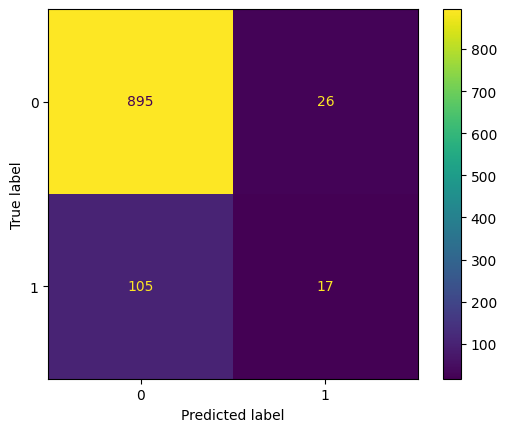

In [48]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()


Class wise Metrics:

Class 0:
1. Precision (0.90) :  Out of all the predicted instance of 0, 90% are class  0
2. Recall (0.97) : Out of all actual instances of 0, 97% are correctly identified by the model.
3. F1-Score(0.93) : Score of 0.93 indicates good balance between Precision and Recall.
4. Support(921) : No. of actual class 0 instances in dataset







 Class 1:
1. Precision (0.40) : Out of all predicted instances of 1, 40% only belong to class 1, remaining 60% are incorrectly classified as 1(FP)
2. Recall (0.14) : Out of all actual instances of 1, 14 % only are predicted correctly by model. This value is very low, indicating 86% of actual class 1 instances are missing.
3. F1-Score(0.21) : Lower F1-score reflects lower balance between precision ad recall due to both having lowe values.
4. Support(122) : No. of actual class 1 instances in dataset





### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---

Overall Metrics:



1.   Accuracy(0.87) : Model is predicting 87% values correctly.
2.   Macro avg : Precision(0.65), recall(0.56), F1-score(0.57) - Arithmetic mean of class 0 and 1s metrices. Treats all classes equally.
3. Weighted avg : Precision(0.84), recall(0.87), F1-score(0.85) - avg of both classes weighted by no. of instances in each class.



Interpretation summary:


1. The model performs well predicting negative class (class 0) than class 1 as per the metrics for class 0.
2. Low recall(0.14) for class 1 indicates that it has difficulty identifying class 1.
3. Though overall accuracy is 87%, it can be misleading due to imbalance in data as seen for class 0 and class 1.
4. Weighted avg gives a more balanced view of model's performance.



Conclusion:

Model is performing well for predicting class 0 i.e. majority class in the dataset while struggling with class 1 i.e minority class specially recall.
Model performance can be further improved by oversampling, undersampling or tuning model for handling the class imbalance.